## Imports

In [25]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, classification_report, precision_recall_fscore_support, accuracy_score

## Visualización

In [2]:
%matplotlib inline

c_gender = {'male': 'blue', 'female': 'pink'}
c_profession = {'politician': 'gray', 'celebrity': 'yellow', 'journalist': 'orange'}
c_i_bin = {'left': 'red', 'right': 'blue'}
c_i_mul = {'left': 'red', 'moderate_left': 'lightcoral', 'moderate_right': 'turquoise', 'right': 'blue'}

## Seed para repetición

In [3]:
seed = 69420
np.random.seed(seed)

## Dataset

In [31]:
df = pd.read_csv(Path("practise_data/politicES_phase_2_train_public.csv"))
# We are only interested in the label and classification
df = df.drop_duplicates(subset=['label'])[['label', 'gender', 'profession', 'ideology_binary', 'ideology_multiclass']]
df

,label,gender,profession,ideology_binary,ideology_multiclass
0,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left
80,00369358fac3b8d42845f82f0c3ececc,male,journalist,left,left
160,00483c4cd74379bc24034ae4085f852e,male,journalist,left,left
240,00584645548f8443d0aad9f6c1a61f52,male,celebrity,right,right
320,00778970ef0702316f52d047e10b0fa1,female,politician,left,moderate_left
...,...,...,...,...,...
179600,ff6c5eee26b2d5eb77198bad4a7d5183,male,journalist,left,moderate_left
179680,ffad184c89ce039af8631437bb57cbf6,male,politician,left,moderate_left
179760,ffb3056ff7d65ccc20863f4ef726bb2b,male,journalist,left,moderate_left
179840,ffcc655c22b6d8b96857db135b61b61a,female,journalist,right,moderate_right


# Model output

In [32]:
output_df = pd.read_csv(Path("test_results.csv"))
output_df

,label,ideology_binary,ideology_multiclass,gender,profession
0,99877ed852bf99a23b16202beebfceeb,left,left,male,journalist
1,3ac0fd83d2e02a87e5a41a26f1dd32a8,left,moderate_left,male,journalist
2,b32161598c24849d1bb4f26c550883f4,right,right,male,journalist
3,92a3f751e8d866f816a0b2e73c56ebdc,left,moderate_left,male,journalist
4,4408af159b44e96f85c9d996474f6cd1,right,moderate_left,male,journalist
...,...,...,...,...,...
2245,e05c563b1b301d30e4825e4e2a41bd97,right,moderate_left,male,journalist
2246,d38d47dc924ef912b3686e4d7d98cd99,left,left,male,journalist
2247,cb69aba921aca718d63b921a941bcf9f,left,moderate_right,male,journalist
2248,87e78313e1aebb027a7d3a2a3eb58a41,right,moderate_right,male,journalist


# Creación de matriz de confusión

In [37]:
comparison_df = pd.merge(output_df, df, how='right', on='label')
comparison_df

,label,ideology_binary_x,ideology_multiclass_x,gender_x,profession_x,gender_y,profession_y,ideology_binary_y,ideology_multiclass_y
0,0008c4fab9e97623a60380ee9c88cb20,left,moderate_left,female,politician,female,politician,left,left
1,00369358fac3b8d42845f82f0c3ececc,right,moderate_right,male,journalist,male,journalist,left,left
2,00483c4cd74379bc24034ae4085f852e,left,left,male,journalist,male,journalist,left,left
3,00584645548f8443d0aad9f6c1a61f52,right,moderate_right,female,journalist,male,celebrity,right,right
4,00778970ef0702316f52d047e10b0fa1,left,moderate_left,female,politician,female,politician,left,moderate_left
...,...,...,...,...,...,...,...,...,...
2245,ff6c5eee26b2d5eb77198bad4a7d5183,left,moderate_left,female,journalist,male,journalist,left,moderate_left
2246,ffad184c89ce039af8631437bb57cbf6,right,moderate_left,female,politician,male,politician,left,moderate_left
2247,ffb3056ff7d65ccc20863f4ef726bb2b,left,moderate_left,female,journalist,male,journalist,left,moderate_left
2248,ffcc655c22b6d8b96857db135b61b61a,left,moderate_left,female,journalist,female,journalist,right,moderate_right


In [56]:
task = 'ideology_binary'
cm = pd.crosstab(comparison_df[f'{task}_y'], comparison_df[f'{task}_x'], rownames=['Real'], colnames=['Predicted'], normalize=True)
# cm = confusion_matrix(comparison_df[f'{task}_y'], comparison_df[f'{task}_x'], normalize = "true")
cm

Predicted,left,right
Real,,
left,0.484000,0.073778
right,0.117778,0.324444


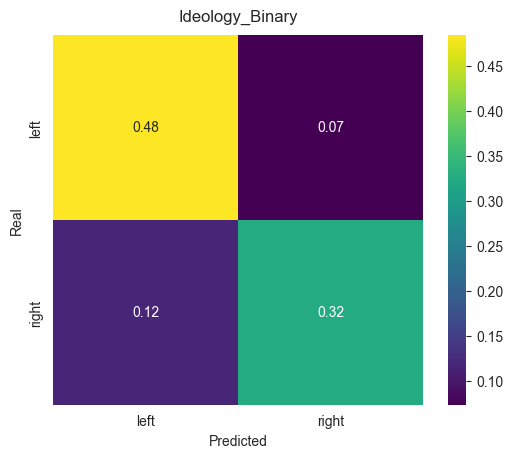

In [57]:
sns.heatmap(cm, square = True, annot = True, fmt = ".2f", cmap="viridis")
plt.title(f'{task}'.title(), pad=10)
plt.savefig(f'images/our_test/{task}_confusion_matrix.png', dpi=500)

# Metrics

In [58]:
print(classification_report(comparison_df[f'{task}_y'], comparison_df[f'{task}_x'], zero_division=0, output_dict=False))

              precision    recall  f1-score   support

        left       0.80      0.87      0.83      1255
       right       0.81      0.73      0.77       995

    accuracy                           0.81      2250
   macro avg       0.81      0.80      0.80      2250
weighted avg       0.81      0.81      0.81      2250

